<a href="https://colab.research.google.com/github/27nando/Consumer_Insight/blob/main/Beats_by_Dre_Consumer_Insights_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project: Consumer Insights Data Analytics Externship of Beats by Dre

Kindly use this template to get an overview of the structure that you need to follow in your capstone project.

Ensure that the final insights that you produce in your analysis stand out and are easily accessible.

You need to provide the code snippets that you used to run the code.

## 1. Title Page
**Project Title:** Consumer Insights Data Analytics Externship of Beats by Dre  
**Student Name:** Nandini Gupta
**Date:** 01/08/2024

## 2. Table of Contents
1. Introduction
2. Data Description
3. Exploratory Data Analysis (EDA)
4. Sentiment Analysis
5. AI-Generated Insights
6. Comparative Analysis
7. Strategic Recommendations
8. Conclusion
9. References

## 3. Introduction

### 3.1 Project Overview
Briefly describe the purpose of the project and outline the key objectives.

This project aims to extract existing reviews of a Beats by Dre audio products from amazon and performing sentiment analysis and exploratory data analysis on the dataset. The data is compared to other reviews of similar audio products from different companies.
The key objectives of the project are:

1. Data Extraction:
Gather reviews for Beats by Dre audio products from Amazon.
Collect reviews for similar audio products from other companies for   comparison.

2. Data Preprocessing:
Clean and preprocess the extracted review data.
Normalize data to ensure consistency across different datasets.

3. Sentiment Analysis:
Perform sentiment analysis on the reviews to determine overall customer sentiment.
Use natural language processing (NLP) techniques to classify reviews as positive, negative, or neutral.

4. Exploratory Data Analysis (EDA):
Conduct EDA to identify trends and patterns within the review data.
Visualize key metrics such as average rating, common keywords, and frequency of reviews over time.

5. Comparative Analysis:
Compare sentiment analysis results of Beats by Dre products with those of similar audio products from other companies.
Identify strengths and weaknesses of Beats by Dre products relative to competitors based on customer feedback.

6. Insights and Recommendations:
Summarize key findings from the sentiment and comparative analysis.
Provide actionable recommendations for Beats by Dre to improve their products and customer satisfaction based on the analysis.
Reporting:


### 3.2 Background
Provide context about Beats by Dre and the importance of consumer sentiment analysis in the tech industry.

Beats by Dre, also known as Beats Electronics, is a prominent brand specializing in audio products, including headphones, earphones, and speakers. Founded by Dr. Dre and Jimmy Iovine in 2006, Beats quickly became a cultural icon, merging high-quality audio performance with stylish design. Known for their bass-heavy sound profile, Beats products cater to a wide range of consumers, from casual listeners to professional musicians. In 2014, Apple Inc. acquired Beats Electronics, further cementing its position in the audio market and expanding its influence within the tech industry.

Consumer sentiment analysis examines customer reviews and feedback to understand their attitudes towards a product or brand. In the rapidly evolving tech industry, it is crucial for identifying strengths and weaknesses, guiding product improvements, and maintaining a competitive edge. By comparing sentiments across similar products, companies can enhance customer satisfaction, make data-driven decisions, and adapt to market trends, ensuring their offerings align with consumer preferences and expectations.

## 4. Data Description

### 4.1 Data Sources
Describe the sources of your data (e.g., Amazon reviews).

All the data gathered was mined from Amazon. THe products and other companies were chosen at random.

### 4.2 Data Collection
Explain the data gathering process, including any challenges faced and how they were overcome.

The data was extracted from Amazon using the Oxylabs API. I used the ecommerce scraper and added the product code (ASIN) of each product I wanted the reviews of. I collected the data of about 100 reviews per product and compiled a dataset of about a 1000 reviews in a csv file.

The data is collected as a json file and then converted into a dataset. Each data set is then compiled into a combined csv file.

In [ ]:
merged_df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11], ignore_index=True)
merged_df
merged_df.to_csv('all_reviews.csv', index=False)

### 4.3 Data Cleaning
Outline the steps taken to clean and preprocess the data, highlighting any significant decisions made during this process.

Load the data below and process cleaning here.

The data is analysed for any null values or duplicates. This is done by using the info() function to find out if there are any null values.

In [ ]:
merged_df.info()

Next, the data is analysed for any duplicates and the duplicates are dropped using the follwoing code:

In [ ]:
df_no_duplicates = merged_df.drop_duplicates()
df_no_duplicates.info()
df_no_duplicates.describe()
df_no_duplicates.dtypes

## 5. Exploratory Data Analysis (EDA)

### 5.1 Data Overview
Provide a summary of the dataset, including key statistics (mean, median, mode, standard deviation, etc.).


I separated the star rating from the content part of the review and added the numerical value to a new column in the dataset. That made it easier to compile a summary of the statistics including mean, median, mode, standard deviation, etc. This gave me the following data:

In [ ]:
# Load dataset
df_reviews = pd.read_csv('reviews_no_duplicates.csv')
# Display first few rows
df_reviews.head()
# Calculate descriptive statistics
mean_rating = df_reviews['stars'].mean()
median_rating = df_reviews['stars'].median()
mode_rating = df_reviews['stars'].mode()[0]
variance_rating = df_reviews['stars'].var()
std_rating = df_reviews['stars'].std()
quantiles_rating = df_reviews['stars'].quantile([0.25, 0.5, 0.75])

print("Mean Rating:", mean_rating)
print("Median Rating:", median_rating)
print("Mode Rating:", mode_rating)
print("Variance Rating:", variance_rating)
print("Standard Deviation Rating:", std_rating)
print("Quantiles Rating:", quantiles_rating)

Mean Rating: 4.162656400384986
Median Rating: 4.0
Mode Rating: 5.0
Variance Rating: 0.8608006438679551
Standard Deviation Rating: 0.9277934273683744
Quantiles Rating: 0.25    4.0
0.50    4.0
0.75    5.0

### 5.2 Visualizations
Include relevant visualizations (histograms, box plots, scatter plots, etc.) and explain what each visualization reveals about the data.

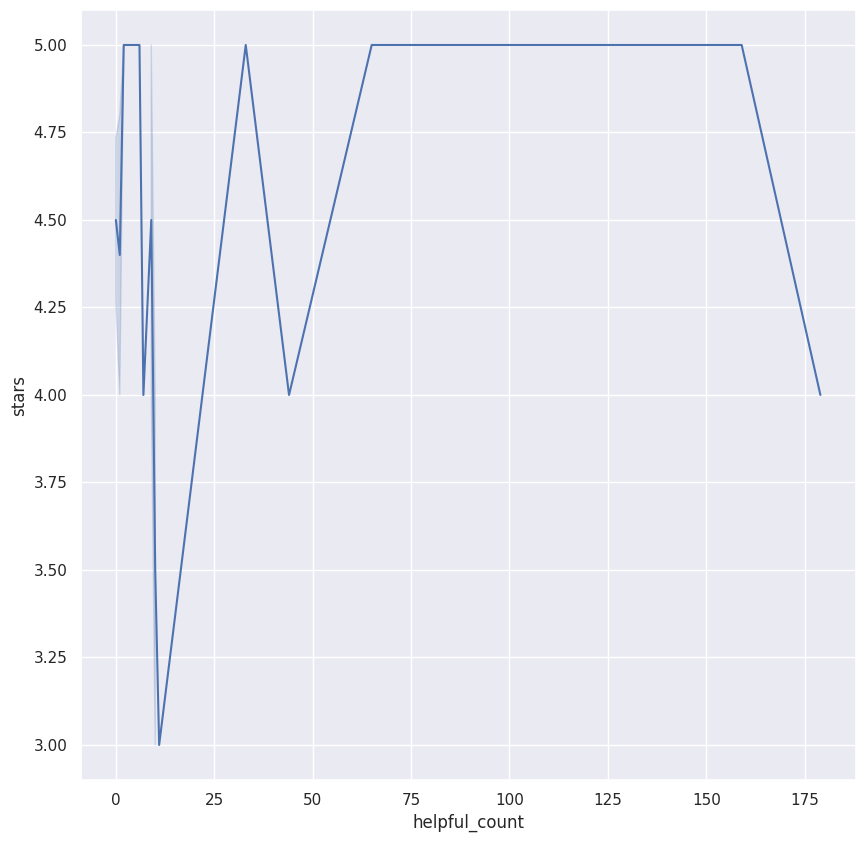

This line chart shows the relation between the star reviews and how helpful they were. This shows us that most reviews are helpful if they are higher in rating. This implies that people find reviews helpful when the reviews let them know that the product is good. This means that customers want their purchase choices to be validated and find it more helpful than when someone posts a negative review that negates their purchase choice.

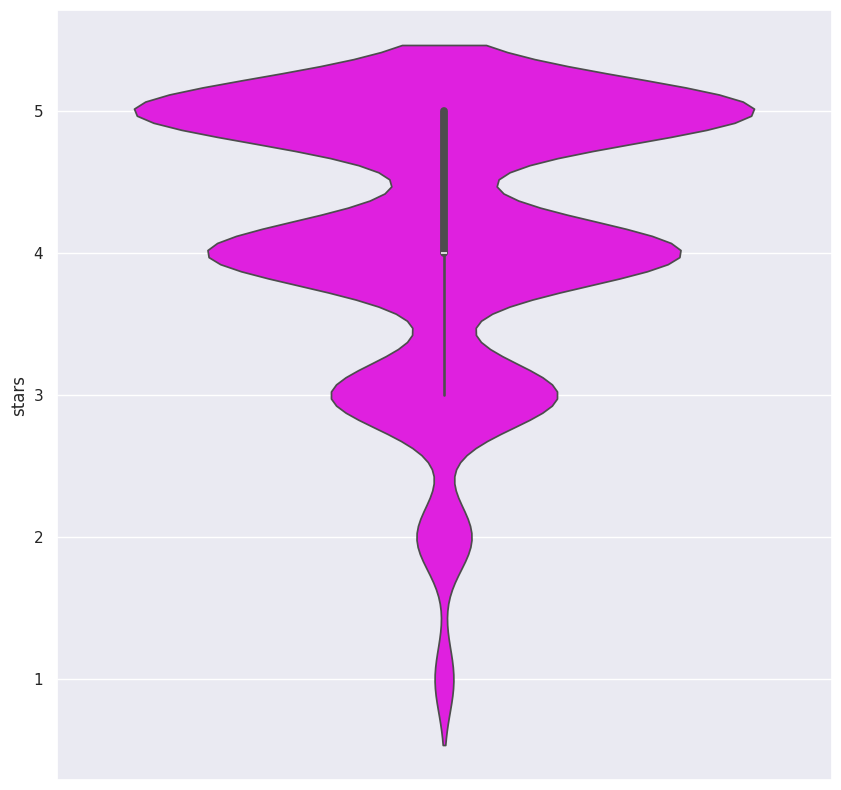

This violin plot depicts the amount of star reviews. This one shows that the Beats Studio Buds+ have a higher volume of good reviews with a higher star rating impplying that the customers are happy with their purchase.

## 6. Sentiment Analysis

### 6.1 Methodology
Explain the sentiment analysis techniques used (e.g., TextBlob, NLTK) and provide code snippets.

Sentiment analysis determines the emotional tone of text, commonly used to gauge public opinion and customer feedback. TextBlob is a Python library that simplifies NLP tasks, including sentiment analysis, with an easy-to-use API. NLTK (Natural Language Toolkit) is another powerful Python library for text processing, offering tools for classification, tokenization, and sentiment analysis.

In [ ]:
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment_analysis_summary(df, text_col):
    nltk.download('vader_lexicon')
    sid = SentimentIntensityAnalyzer()
    sentiment_counts = {"Positive": 0, "Negative": 0, "Neutral": 0}

    for review in df[text_col]:
        blob = TextBlob(review)
        sentiments = blob.sentiment
        label = "Positive" if sentiments.polarity > 0 else "Negative" if sentiments.polarity < 0 else "Neutral"
        sentiment_counts[label] += 1
        df.loc[df[text_col] == review, "Sentiment"] = label

    return sentiment_counts


This code snippet allows the data to be categorised using the customer's sentiments. The code categorises each review into positive, negatie, and neutral reviews using sentiment analysis.

### 6.2 Results
Present the sentiment analysis results, including visualizations of sentiment distribution, and discuss the overall sentiment towards Beats by Dre products.


I compiled all the data and presented it in the form of a scatter plot to see the sentiment of each product compared to Beats by Dre.

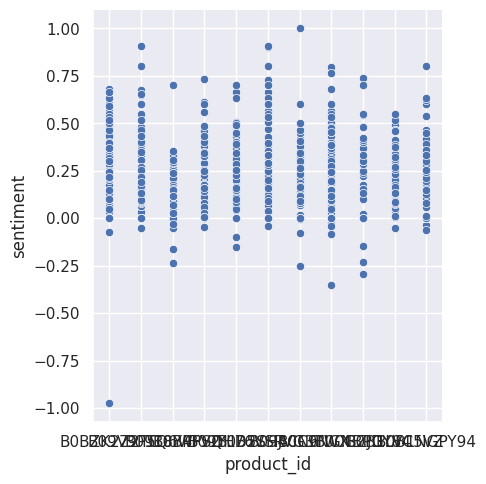

## 7. AI-Generated Insights

### 7.1 Using Gemini AI
Briefly explain how Gemini AI was used to extract insights and include any relevant code snippets or explanations.

I used an API key to call the functions I needed from Gemini AI. I set up a simple chatbot using Python and Gemini AI in a Google Collab Notebook. Then I integrated the dataset with the chatbot to get insights about the data.

Then I performed analysis using AI on subsets of data to get appropriate insights.

In [ ]:
# Function to set up a simple chatbot
def simple_chatbot(api_key, message):
    genai.configure(api_key=api_key)

    model = genai.GenerativeModel(
        model_name="gemini-1.5-flash",
        generation_config={
            "temperature": 1,
            "top_p": 0.95,
            "top_k": 64,
            "max_output_tokens": 8192,
            "response_mime_type": "text/plain",
        },
    )

    chat_session = model.start_chat(history=[])

    response = chat_session.send_message(message)
    return response.text

In [ ]:
# Load dataset
df = pd.read_csv('/content/reviews_no_duplicates.csv')

In [ ]:
# Function to analyze reviews using Gemini AI
def analyze_reviews(reviews, api_key,prompt_message):
    genai.configure(api_key=api_key)

    model = genai.GenerativeModel(
        model_name="gemini-1.5-flash",
        generation_config={
            "temperature": 1,
            "top_p": 0.95,
            "top_k": 64,
            "max_output_tokens": 8192,
            "response_mime_type": "text/plain",
        },
    )

    chat_session = model.start_chat(history=[])

    prompt = prompt_message + "\n\n".join(reviews)
    response = chat_session.send_message(prompt)
    return response.text

### 7.2 Key Insights
Summarize the key insights generated by Gemini AI, including specific examples of prompts used and the responses received.


The AI allowed me to gain insight into the data more than numerical statistics, but actually go further by providing more information about the data trends and summarize the general idea.

In [ ]:
prompt_message = "Analyze the following reviews and summarize the key insights:"
insights = analyze_reviews(reviews, api_key, prompt_message)
print(insights)

This is the reply it generated:
## Key Insights from Beats Studio Buds+ Reviews:

**Pros:**

* **Great sound quality:** Many reviewers praise the Beats Studio Buds+ for their balanced sound profile with impressive bass, clear highs, and detailed mids.
* **Good noise cancellation:**  The ANC effectively reduces noise, especially in loud environments, although some users report it's not as effective as over-ear headphones.
* **Comfortable fit:**  The earbuds are comfortable for extended wear and stay secure in the ear, even during exercise, thanks to the included ear tip sizes.
* **Long battery life:** The battery life is excellent, with most users reporting around 7-9 hours of playback time on a single charge.
* **Seamless Apple integration:** They pair easily with Apple devices and offer a dedicated menu in iOS settings for control.
* **Strong Bluetooth connection:** Most users report a stable connection, even over longer distances.
* **Durable:** The earbuds are built well and can withstand accidental drops.

**Cons:**

* **Pricey:** They are expensive compared to other earbuds on the market, though some reviewers find them competitive for the features they offer.
* **No wireless charging:** You need to charge them via USB-C.
* **Microphone issues:** Some reviewers report inconsistent microphone performance, leading to difficulty being heard on calls.
* **Fit issues:**  Some users experience problems with the earbuds staying secure in their ears, especially during intense activities.
* **Lack of customization:** No EQ settings are available for customizing sound profiles.
* **Case design:**  The case is bulky and some users find it difficult to retrieve the earbuds from the case.

### 7.3 Interpretation
Discuss how these insights can be interpreted and their relevance to Beats by Dre.

These insights allow us to come to the following conclusion:

The Beats Studio Buds+ are a good choice for those seeking high-quality sound, comfortable fit, and long battery life.  They integrate seamlessly with Apple devices, making them an attractive option for iPhone users. However, some users experienced issues with microphone performance, fit, and lack of customization. If these cons are important to you, you might want to consider other options.

## 8. Comparative Analysis

### 8.1 Competitor Overview
List the competitors analyzed and provide a brief overview of their market positioning.

I gathered data from and conducted analysis for the top competitors of Beats by Dre. These companies are the top companies in the audio sector and have been the Titans of the sound industry. These companies include:
1. Google : Known for its integration with Google Assistant, Google’s audio products like the Pixel Buds emphasize smart features and seamless connectivity within the Google ecosystem.

2. Soundcore : Offering a balance of affordability and quality, Soundcore appeals to budget-conscious consumers looking for reliable audio products without compromising on performance.

3. Marshall : Renowned for its iconic design inspired by classic amplifiers, Marshall targets consumers who value a blend of vintage aesthetics and high-quality sound.

4. Skullcandy : Focused on the youth market, Skullcandy combines vibrant designs with affordable pricing, catering to active and adventurous users with its durable and trendy audio products.

5. Samsung : Leveraging its vast electronics portfolio, Samsung integrates advanced features and connectivity options into its audio products, appealing to tech enthusiasts and users within the Samsung ecosystem.

6. Amazon : Known for its Alexa-enabled Echo devices, Amazon targets smart home users, offering convenience and smart functionality at competitive prices.

7. JBL : A subsidiary of Harman International, JBL is known for its robust, portable speakers and headphones, catering to both casual listeners and professionals with its diverse product range.

8. Senheiser : With a strong reputation for audiophile-grade products, Sennheiser focuses on delivering exceptional sound quality, appealing to discerning listeners and professional audio engineers.

9. Bose : Bose is synonymous with noise-cancelling technology and premium sound quality, targeting high-end consumers and frequent travelers seeking top-notch audio performance and comfort.

10. Sony : A leader in the electronics market, Sony offers a wide range of audio products known for their innovative features, superior sound quality, and integration with Sony’s entertainment ecosystem, appealing to a broad spectrum of users from casual listeners to audiophiles.

### 8.2 Comparison of Sentiments
Compare the sentiment analysis results of Beats by Dre with its competitors using visualizations to highlight differences and similarities.

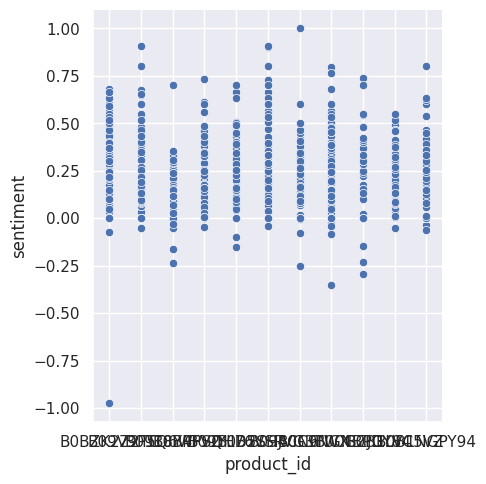

### 8.3 SWOT Analysis
Conduct a SWOT analysis (Strengths, Weaknesses, Opportunities, Threats) for Beats by Dre based on the comparative data.

**S**trengths :
* **Sound Quality:**  Reviewers consistently highlight the impressive sound quality, particularly the clear highs, deep bass, and well-balanced mids. Many users find the audio experience satisfying, even comparing it favorably to higher-priced earbuds.
* **Noise Cancellation:** While not as effective as some dedicated noise-canceling headphones, the Buds+ offer decent noise reduction, particularly in moderately loud environments. The transparency mode also works well for being aware of surroundings.
* **Fit and Comfort:**  Reviewers appreciate the comfortable fit and secure hold of the Buds+, with many mentioning that they stay in place even during exercise. The multiple ear tip sizes help achieve a personalized fit for various ear shapes.
* **Battery Life:** The Buds+ offer excellent battery life, lasting up to 9 hours on a single charge and with the case providing an additional 36 hours. This long battery life is a significant advantage for many users.
* **Connectivity:** The pairing process is seamless with Apple devices, and the Bluetooth connection is consistently strong and reliable, with minimal latency.
* **Ease of Use:** The touch controls are responsive and intuitive, and the physical buttons provide a satisfying tactile feedback. The app allows customization of features like listening modes and button functions.
* **Durability:** Several users report the Buds+ surviving drops and other incidents without damage, indicating a sturdy build quality.

**W**eaknesses :
* **Microphone Issues:** This is the most common complaint. Several reviewers report issues with microphone quality, particularly during phone calls. The microphone may pick up excessive background noise, making conversations difficult or impossible in noisy environments.
* **Connectivity Issues:** Some users experience sporadic disconnections, particularly with iPhones. These issues can be frustrating, especially during calls or music playback.
* **Fit Issues:** While many find the fit comfortable, some reviewers report difficulty with the earbuds staying in their ears, particularly during strenuous activities.
* **Limited Features:** The Buds+ lack features like wireless charging, in-ear detection, and customizable EQ settings, which are present in competitors like AirPods Pro.
* **Price:** Some reviewers find the price point a bit high, especially considering the reported microphone issues and the lack of certain features.

**O**pportunities :
**1. Address Microphone Issues:**
* **Clarity and Consistency:** Multiple reviewers reported issues with the microphone, including poor voice clarity and unexpected muting during calls. This is a significant drawback for a product marketed for phone calls and needs immediate attention.
* **Background Noise Reduction:** While some users appreciated the noise cancellation for calls, others noted that it wasn't always effective, leading to a muffled sound for the recipient.
* **Solution:** Investigate and fix the microphone issues to ensure consistent and clear audio transmission during calls, even in noisy environments.

**2. Enhance Noise Cancellation:**
* **Humming Noise:** Some users experienced a constant humming sound when noise cancellation was activated, detracting from the user experience.
* **Adaptability:** The adaptive noise cancellation, while appreciated by some, wasn't consistently effective, leading to inconsistent performance.
* **Solution:**  Improve the noise cancellation algorithm to eliminate the humming sound and ensure consistent and effective noise reduction across various environments.

**3. Improve Connectivity:**
* **Disconnection Issues:**  Some users experienced frequent disconnections, particularly when paired with iPhones. This issue needs to be addressed to ensure a seamless and reliable connection.
* **Bluetooth Range:** While some users were impressed with the Bluetooth range, others felt it was too limited, especially when compared to AirPods.
* **Solution:**  Optimize the Bluetooth connection for stability and reliability across various devices, including iPhones. Consider expanding the Bluetooth range for a more consistent user experience.

**4. Address Fit and Comfort:**
* **Secure Fit:** Several users found the earbuds prone to falling out, particularly during physical activities. This is a common complaint with in-ear buds and needs to be addressed.
* **Ear Tip Options:** While multiple sizes are provided, some users still struggled to find a secure fit. Offer additional tip options or consider a more adaptive ear tip design.
* **Solution:**  Focus on improving the fit and comfort of the earbuds to ensure a secure and comfortable fit for a wider range of ear shapes.

**T**hreats :
**1. Competition from Apple AirPods:**

* **Stronger Bluetooth:** Many reviews mention the Beats Buds+ Bluetooth connection is strong but not as strong as AirPods. This could be a concern for users who require a reliable connection in challenging environments.
* **Seamless Apple Integration:** The AirPods have advantages in integration with Apple devices, like automatic source switching, in-ear detection, and wireless charging. This is a key feature that Beats Buds+ are lacking, potentially giving AirPods an edge for Apple users.

**2. Sound Quality & Features:**

* **No Customizable EQ:** The lack of EQ settings could be a deterrent for users who want to tailor the sound to their preferences, especially those who enjoy specific genres of music.
* **Limited Bass:**  While generally praised for sound quality, some reviews mention the bass is not as punchy as other earbuds in its class. This might turn off audiophiles or those seeking a powerful bass experience.
* **Noise Cancellation Inconsistency:** Several reviews report inconsistent noise cancellation, including a humming sound and limited effectiveness in noisy environments. This could impact user satisfaction and highlight a potential weakness compared to competitors.
* **Transparency Mode Issues:** Users report sudden loud noises in the transparency mode, potentially uncomfortable or even harmful for users with sensitive hearing.

**3. Design & Fit:**

* **Difficult Removal from Case:** The design of the earbuds can make them difficult to remove from the case, particularly for users with larger hands or long nails. This could be a frustrating aspect for daily use.
* **Fit Issues:** While generally considered comfortable, some users report issues with the earbuds falling out, particularly during physical activities. This could be a major concern for users who rely on their earbuds for exercise or other demanding activities.

**4. Connectivity & Microphone:**

* **Bluetooth Disconnections:** Some reviewers experience disconnections when paired with iPhones, particularly after pausing playback. This could be a significant issue for users who rely on a stable connection.
* **Microphone Problems:**  Several reviewers report issues with the microphone, including muffled sound and occasional inability for the other party to hear them during calls. This could be a major deterrent for users who frequently use the earbuds for phone conversations.


## 9. Strategic Recommendations

### 9.1 Product Improvements
Based on the analysis, suggest specific product improvements.

Based on the negative reviews, here are some improvements that could be made to the Beats Studio Buds+:

**1. Address Inconsistent Sound Playback:**
* Some reviewers experienced problems with sound dropping out or being interrupted during playback.
* **Solution:** Investigate and address potential software bugs that might be causing these interruptions.

**2. Improve Ease of Use with Case:**
* The case design was criticized for making it difficult to remove the earbuds.
* **Solution:** Consider a different case design with a more intuitive way to release the earbuds.

**3. Add Customizable EQ:**
* The lack of an equalizer was mentioned as a drawback, especially for those who prefer to fine-tune their sound preferences.
* **Solution:** Include a customizable EQ feature within the Beats app.

**4. Improve Transparency Mode for Phone Calls:**
* Some users found the transparency mode too loud, making it difficult to hear a phone conversation in noisy environments.
* **Solution:** Offer adjustable transparency levels to allow users to control the volume of ambient noise.

**5. Consider Adding Wireless Charging:**
* The absence of wireless charging was mentioned as a disadvantage compared to other high-end earbuds.
* **Solution:** Integrate wireless charging capability in future iterations of the product.

**6. Address Earbud Fit Issues:**
* Some users had trouble finding a comfortable fit that prevented the earbuds from falling out, even after trying different ear tips.
* **Solution:** Explore different ear tip designs or materials to better accommodate a wider range of ear shapes.


### 9.2 Marketing Strategies
Provide recommendations for marketing strategies that could enhance consumer perception and satisfaction.

1. Beats can perform a demonstration where they set up an exhibition with people using Beats products for a long time. This would showcase the long battery life, and how comfortable they are for long wear.
2. Beats can have a public demonstration where we can show how people wearing Beats will be unaffected because of the stellar Noise Cancelling feature.
3. Beats should focus on targeting more people who use android phones, and try to shift their focus from Apple users.

## 10. Conclusion
Summarize the key findings and their implications, and reflect on the overall project and its contribution to understanding consumer sentiment for Beats by Dre.

The sentiment analysis of Beats by Dre reviews, compared to top competitors like Sony, Bose, and JBL, revealed that Beats maintains a strong brand image with positive sentiment driven by its stylish design and integration with Apple products. However, some consumers noted a preference for sound quality and noise cancellation in competitors' products. This project highlighted Beats' strengths in branding and aesthetics but suggested potential areas for product improvement. Overall, the analysis provides valuable insights into consumer preferences, aiding Beats by Dre in enhancing product features and maintaining competitive market positioning.

## 11. References
List all the sources, tools, and references used in the project.


In [ ]:
Extern Website
OxyLabs API
Gemini AI
Google Collab
Python